In [77]:
import talib
import numpy as np
import yfinance as yf
import vectorbt as vbt
import mplfinance as mpf
import pandas as pd
import pandas_ta as ta

In [78]:
data = pd.DataFrame()
data = data.ta.ticker('aapl', period='10d', interval='15m')
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-03-11 15:00:00-05:00,155.910004,156.020004,155.160004,155.209900,2111777,0,0
2022-03-11 15:15:00-05:00,155.214005,155.470001,155.009995,155.085007,2273366,0,0
2022-03-11 15:30:00-05:00,155.080002,155.360001,154.889999,155.160004,3791279,0,0
2022-03-11 15:45:00-05:00,155.164993,155.249802,154.500000,154.729996,8280777,0,0
2022-03-11 16:00:00-05:00,154.729996,154.729996,154.729996,154.729996,0,0,0


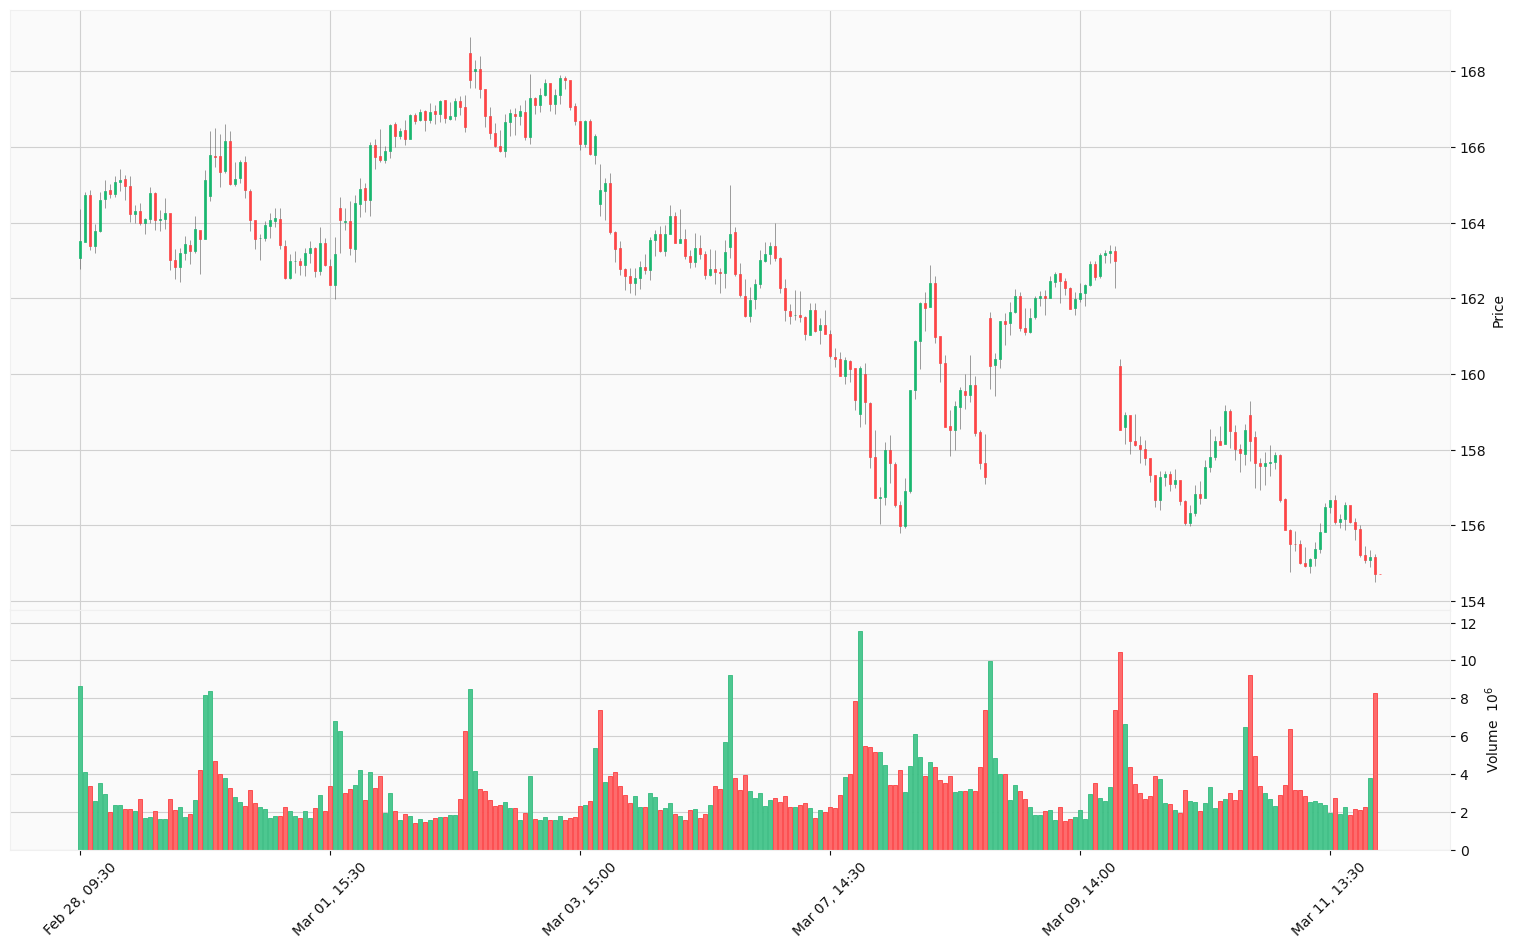

In [79]:
mpf.plot(data, type='candle', style='yahoo', figsize=(20, 12), volume=True)

In [80]:
data.copy().ta.cdl_pattern(name='all').columns

Index(['CDL_2CROWS', 'CDL_3BLACKCROWS', 'CDL_3INSIDE', 'CDL_3LINESTRIKE',
       'CDL_3OUTSIDE', 'CDL_3STARSINSOUTH', 'CDL_3WHITESOLDIERS',
       'CDL_ABANDONEDBABY', 'CDL_ADVANCEBLOCK', 'CDL_BELTHOLD',
       'CDL_BREAKAWAY', 'CDL_CLOSINGMARUBOZU', 'CDL_CONCEALBABYSWALL',
       'CDL_COUNTERATTACK', 'CDL_DARKCLOUDCOVER', 'CDL_DOJI_10_0.1',
       'CDL_DOJISTAR', 'CDL_DRAGONFLYDOJI', 'CDL_ENGULFING',
       'CDL_EVENINGDOJISTAR', 'CDL_EVENINGSTAR', 'CDL_GAPSIDESIDEWHITE',
       'CDL_GRAVESTONEDOJI', 'CDL_HAMMER', 'CDL_HANGINGMAN', 'CDL_HARAMI',
       'CDL_HARAMICROSS', 'CDL_HIGHWAVE', 'CDL_HIKKAKE', 'CDL_HIKKAKEMOD',
       'CDL_HOMINGPIGEON', 'CDL_IDENTICAL3CROWS', 'CDL_INNECK', 'CDL_INSIDE',
       'CDL_INVERTEDHAMMER', 'CDL_KICKING', 'CDL_KICKINGBYLENGTH',
       'CDL_LADDERBOTTOM', 'CDL_LONGLEGGEDDOJI', 'CDL_LONGLINE',
       'CDL_MARUBOZU', 'CDL_MATCHINGLOW', 'CDL_MATHOLD', 'CDL_MORNINGDOJISTAR',
       'CDL_MORNINGSTAR', 'CDL_ONNECK', 'CDL_PIERCING', 'CDL_RICKSHAWMAN',
       

In [81]:
df = data.copy()
df.ta.cdl_pattern(name='hammer', append=True)
df[df['CDL_HAMMER'] != 0]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CDL_HAMMER
Datetime,,,,,,,,
2022-02-28 12:45:00-05:00,163.990005,164.119995,163.710007,164.105194,1649396,0,0,100.0
2022-03-02 13:45:00-05:00,166.949997,166.970001,166.410004,166.702896,1436524,0,0,100.0
2022-03-04 10:45:00-05:00,162.779999,162.800003,162.220001,162.580093,2900329,0,0,100.0
2022-03-11 11:30:00-05:00,155.884995,155.919998,154.779999,155.509995,6390653,0,0,100.0


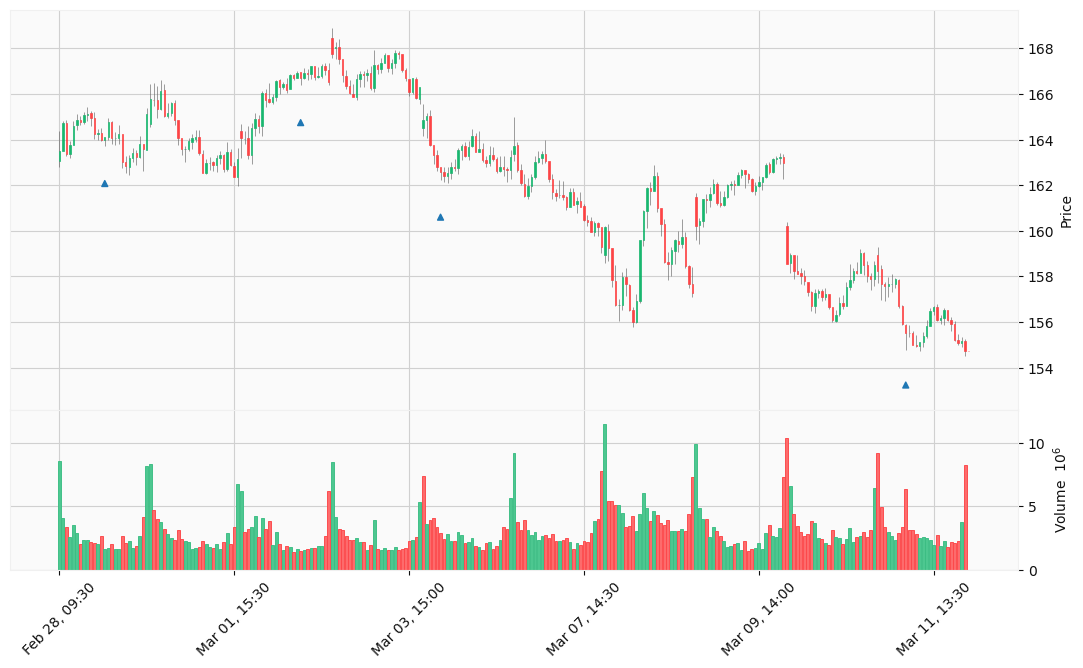

In [82]:
df['mark_position'] = df['Low'] * 0.99
marks = ['^' if x == 100 else '' for x in df['CDL_HAMMER']]
cdl_plot = mpf.make_addplot(df['mark_position'], type='scatter', marker=marks)
mpf.plot(data, addplot=cdl_plot, type='candle', style='yahoo', figsize=(14, 8), volume=True)

In [83]:
buy_signal = ['morningstar', 'hammer', '3whitesoldiers']
sell_signal = ['eveningstar', 'shootingstar', '3blackcrows']

all_signal = buy_signal + sell_signal

In [84]:
df = data.copy()
df.ta.cdl_pattern(name=all_signal, append=True)
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'CDL_MORNINGSTAR', 'CDL_HAMMER', 'CDL_3WHITESOLDIERS',
       'CDL_EVENINGSTAR', 'CDL_SHOOTINGSTAR', 'CDL_3BLACKCROWS'],
      dtype='object')

In [85]:
df.loc[(df.iloc[:,-6]!=0) | (df.iloc[:,-5]!=0) | (df.iloc[:,-4]!=0)] # buy signal

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CDL_MORNINGSTAR,CDL_HAMMER,CDL_3WHITESOLDIERS,CDL_EVENINGSTAR,CDL_SHOOTINGSTAR,CDL_3BLACKCROWS
Datetime,,,,,,,,,,,,,
2022-02-28 12:45:00-05:00,163.990005,164.119995,163.710007,164.105194,1649396,0,0,0.0,100.0,0.0,0.0,0.0,0.0
2022-03-02 13:45:00-05:00,166.949997,166.970001,166.410004,166.702896,1436524,0,0,0.0,100.0,0.0,0.0,0.0,0.0
2022-03-04 10:45:00-05:00,162.779999,162.800003,162.220001,162.580093,2900329,0,0,0.0,100.0,0.0,0.0,0.0,0.0
2022-03-11 11:30:00-05:00,155.884995,155.919998,154.779999,155.509995,6390653,0,0,0.0,100.0,0.0,0.0,0.0,0.0


In [86]:
df.loc[(df.iloc[:,-3]!=0) | (df.iloc[:,-2]!=0) | (df.iloc[:,-1]!=0)] # sell signal

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CDL_MORNINGSTAR,CDL_HAMMER,CDL_3WHITESOLDIERS,CDL_EVENINGSTAR,CDL_SHOOTINGSTAR,CDL_3BLACKCROWS
Datetime,,,,,,,,,,,,,
2022-03-11 13:45:00-05:00,156.660004,156.794998,156.050003,156.089996,2741312,0,0,0.0,0.0,0.0,-100.0,0.0,0.0


In [87]:
df.loc[(df.iloc[:,-6]!=0 )| (df.iloc[:,-5]!=0) | (df.iloc[:,-4]!=0), 'signal'] = 'buy'
df.loc[(df.iloc[:,-4]!=0 )| (df.iloc[:,-3]!=0) | (df.iloc[:,-2]!=0), 'signal'] = 'sell'

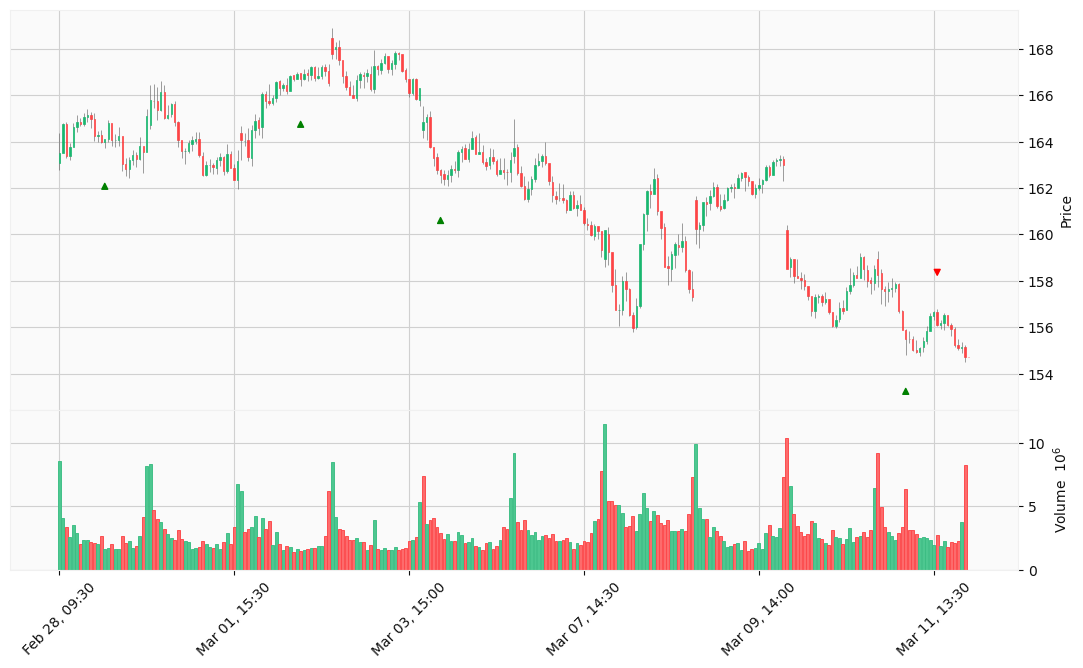

In [88]:
df.loc[df['signal'] == 'buy', 'mark_price'] = df['Low'] *0.99
df.loc[df['signal'] == 'sell','mark_price']  = df['High'] *1.01

marks = ['^' if x == 'buy' else 'v' if x == 'sell' else '' for x in df['signal']]
color = ['g' if x == 'buy' else 'r' if x == 'sell' else 'b' for x in df['signal']]
cdl_plot = mpf.make_addplot(df['mark_price'],type='scatter',marker=marks,color=color)

mpf.plot(data,addplot=cdl_plot ,type='candle',style='yahoo',figsize=(14,8),volume=True)